# Task 5
## SALES PREDICTION USING PYTHON
Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.
Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let's start the task of sales prediction with machine learning using Python.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [33]:
# Loading the csv file into a DataFrame
data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [34]:
# Removing the Id column since it is not useful
data.drop(columns=["Unnamed: 0"], inplace=True)
data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [35]:
# Displaying the size and shape of the DataFrame
print(f"Size of the dataset: {data.size}")
print(f"Shape of the dataset: {data.shape}")


Size of the dataset: 800
Shape of the dataset: (200, 4)


In [36]:
# Displaying information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [37]:
# Checking for any missing values in the DataFrame
null_values = data.isna().sum()
print(f"Missing values:\n{null_values}")

Missing values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [38]:
# Performing descriptive statistics on the DataFrame
statistics = data.describe()
print(statistics)

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


<Axes: >

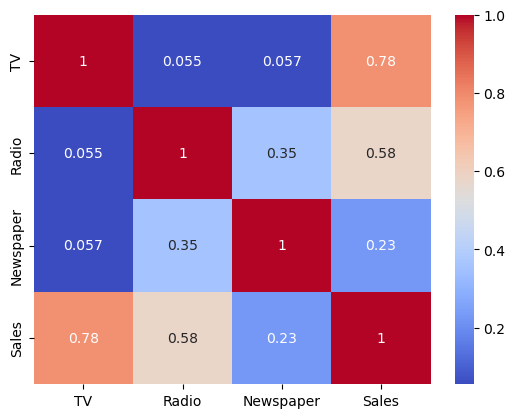

In [39]:
# Plotting a heatmap to show the correlation matrix
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

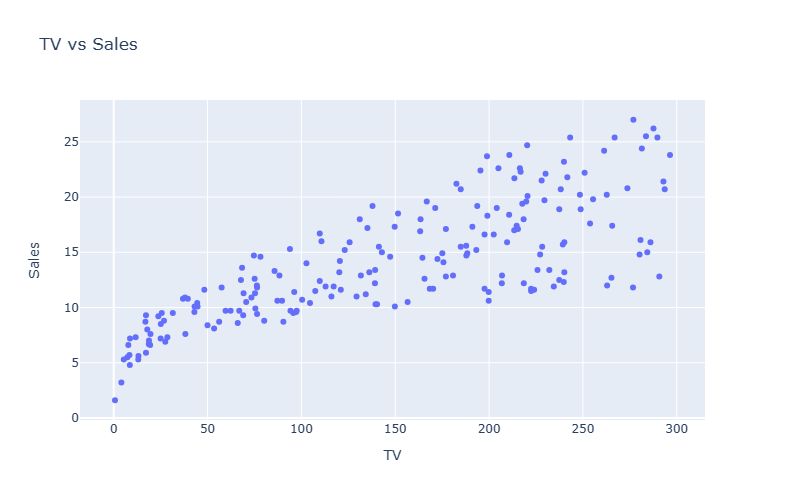

In [42]:
# Scatter plots to show the relationship between TV, Radio, Newspaper and Sales
fig_tv = px.scatter(data, x='TV', y='Sales', title='TV vs Sales', width=550, height=500)
fig_tv.show()

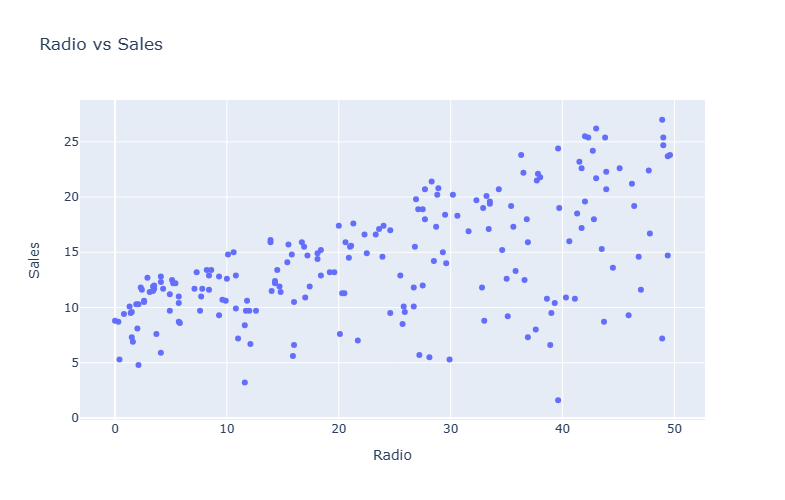

In [43]:
fig_radio = px.scatter(data, x='Radio', y='Sales', title='Radio vs Sales', width=550, height=500)
fig_radio.show()


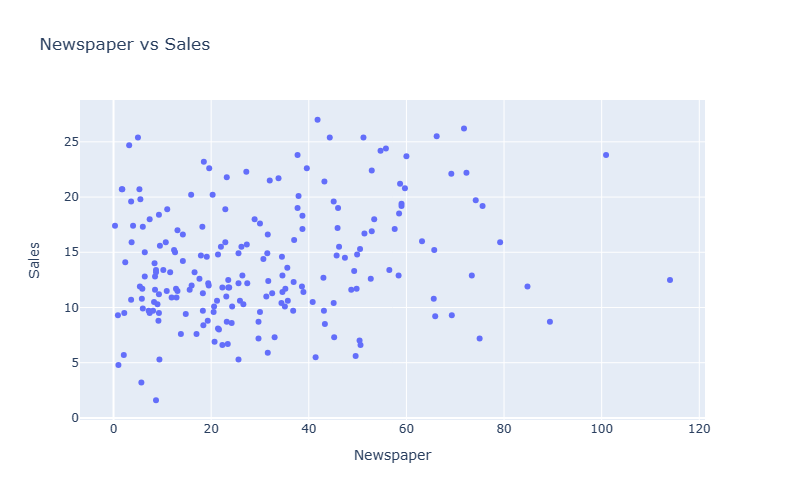

In [44]:
fig_newspaper = px.scatter(data, x='Newspaper', y='Sales', title='Newspaper vs Sales', width=550, height=500)
fig_newspaper.show()

In [45]:
# Splitting the dataset into features and target variable
features = data[['TV', 'Radio', 'Newspaper']]
target = data['Sales']

In [46]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [47]:
# Creating and training the linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [48]:
# Predicting the target variable for the test set
Y_pred = regressor.predict(X_test)

# Displaying the intercept and coefficients of the model
print(f"Intercept: {regressor.intercept_}")
print(f"Coefficients: {regressor.coef_}")

Intercept: 2.979067338122629
Coefficients: [0.04472952 0.18919505 0.00276111]


In [49]:
# Calculating and printing various error metrics
from sklearn import metrics
mae = metrics.mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
r2 = metrics.r2_score(Y_test, Y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-Squared: {r2}")

Mean Absolute Error: 1.4607567168117606
Root Mean Squared Error: 1.7815996615334502
R-Squared: 0.899438024100912


    Actual  Predicted
0     16.9  16.408024
1     22.4  20.889882
2     21.4  21.553843
3      7.3  10.608503
4     24.7  22.112373
5     12.6  13.105592
6     22.3  21.057192
7      8.4   7.461010
8     11.5  13.606346
9     14.9  15.155070
10     9.5   9.048320
11     8.7   6.653283
12    11.9  14.345545
13     5.3   8.903493
14    10.3   9.689590
15    11.7  12.164944
16     5.5   8.736284
17    16.6  16.265073
18    11.3  10.277596
19    18.9  18.831091
20    19.7  19.560367
21    12.5  13.251035
22    10.9  12.336207
23    22.2  21.306951
24     9.3   7.827403
25     8.1   5.809574
26    21.7  20.757532
27    13.4  11.981381
28    10.6   9.183496
29     5.7   8.506699
30    10.6  12.466468
31    11.3  10.003377
32    23.7  21.387671
33     8.7  12.249664
34    16.1  18.266615
35    20.7  20.137663
36    11.6  14.055140
37    20.8  20.854112
38    11.9  11.017444
39     6.9   4.568996


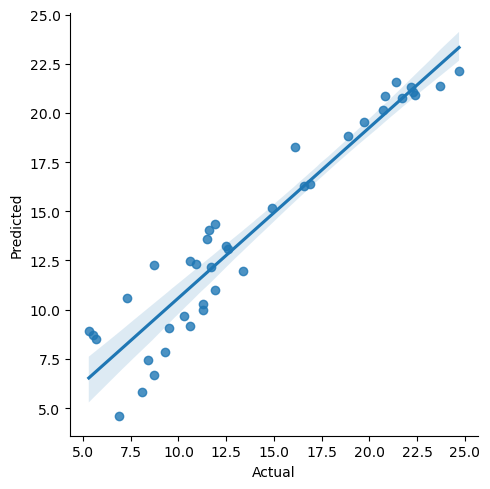

In [50]:
# Creating a DataFrame to compare actual and predicted values
comparison = pd.DataFrame({'Actual': Y_test.values, 'Predicted': Y_pred})
print(comparison)

# Visualizing the actual vs predicted values using seaborn
sns.lmplot(x='Actual', y='Predicted', data=comparison)


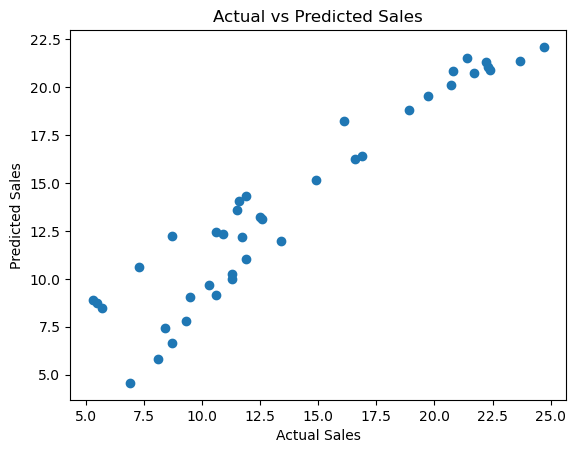

In [51]:
# Scatter plot of actual vs predicted values
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()